<h2>ESRGAN Sample Inference Testing</h2>


In [1]:
!git clone https://github.com/xinntao/ESRGAN.git

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 225 (delta 15), reused 14 (delta 14), pack-reused 205 (from 1)
Receiving objects: 100% (225/225), 24.86 MiB | 40.99 MiB/s, done.
Resolving deltas: 100% (85/85), done.


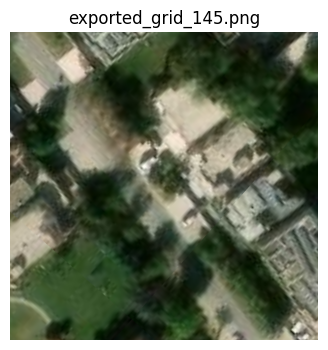

✅ Saved: exported_grid_145.png


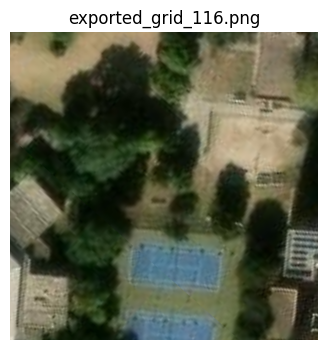

✅ Saved: exported_grid_116.png


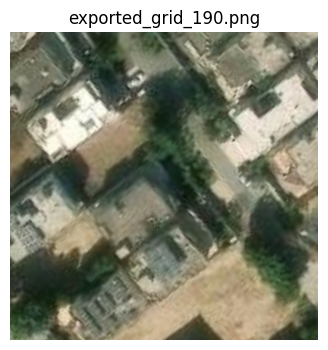

✅ Saved: exported_grid_190.png


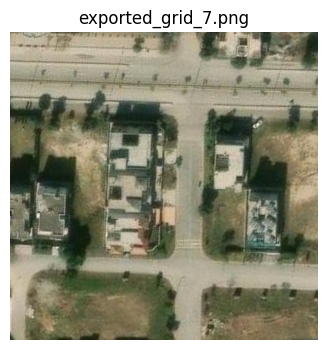

✅ Saved: exported_grid_7.png


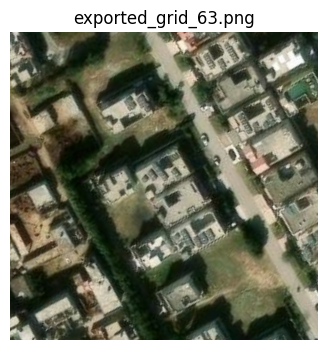

✅ Saved: exported_grid_63.png


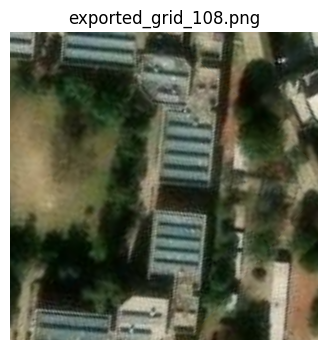

✅ Saved: exported_grid_108.png


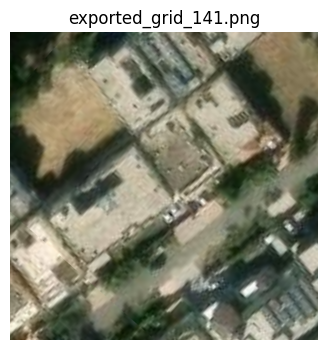

✅ Saved: exported_grid_141.png


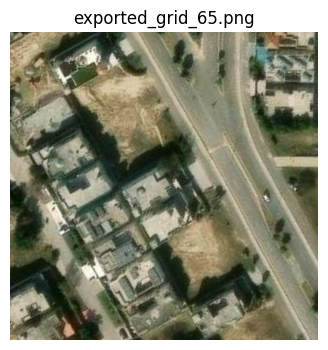

✅ Saved: exported_grid_65.png


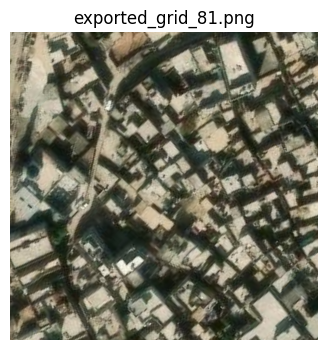

✅ Saved: exported_grid_81.png


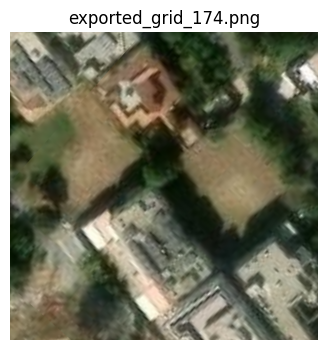

✅ Saved: exported_grid_174.png


In [43]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random

input_dir = '/kaggle/input/satellite-imagery-lahore-dha-phase-6/images'
output_dir = '/kaggle/working/ESRGAN/LR'
os.makedirs(output_dir, exist_ok=True)
output_size = 1024

img_paths = glob.glob(os.path.join(input_dir, '*'))

subset_paths = random.sample(img_paths, min(10, len(img_paths)))  # Take 10 or fewer if less available

for path in subset_paths:
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"❌ Failed to read {path}")
        continue

    h, w = img.shape[:2]
    scale = output_size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    pad_left = (output_size - new_w) // 2
    pad_right = output_size - new_w - pad_left
    pad_top = (output_size - new_h) // 2
    pad_bottom = output_size - new_h - pad_top

    padded_img = cv2.copyMakeBorder(
        resized_img, pad_top, pad_bottom, pad_left, pad_right,
        borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0)
    )

    # Visualize
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(path))
    plt.axis('off')
    plt.show()

    # Save to output
    filename = os.path.basename(path)
    cv2.imwrite(os.path.join(output_dir, filename), padded_img)
    print(f"✅ Saved: {filename}")


<h3>Download the model files from Google Drive link specified in the github repository</h3>

In [22]:
model_src_path = '/kaggle/input/esrgan/pytorch/default/1/RRDB_ESRGAN_x4.pth'
model_dest_path = '/kaggle/working/ESRGAN/models'

shutil.copy(model_src_path, model_dest_path)

os.listdir(model_dest_path)

['README.md', 'RRDB_ESRGAN_x4.pth']

In [44]:
!python /kaggle/working/ESRGAN/temp.py

/kaggle/working/ESRGAN/temp.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path), strict=True)
Model loaded from: /kaggle/workin

ValueError: num must be an integer with 1 <= num <= 10, not 11

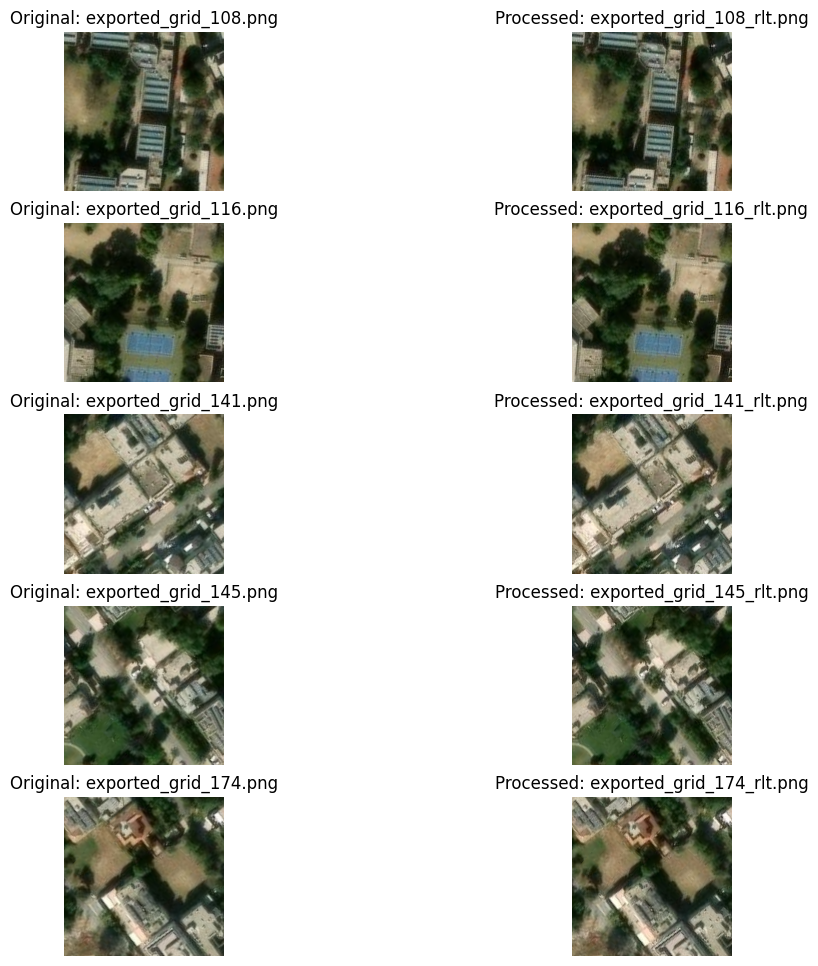

In [51]:
import cv2
import matplotlib.pyplot as plt
import os

# Directories
original_dir = '/kaggle/working/ESRGAN/LR'
processed_dir = '/kaggle/working/ESRGAN/results'

# Get all images in the original and processed directories
original_images = sorted(os.listdir(original_dir))
processed_images = sorted(os.listdir(processed_dir))

# Check if both directories have the same number of images
assert len(original_images) == len(processed_images), "The number of original and processed images don't match!"

# Visualize the original and processed images side by side
plt.figure(figsize=(12, 12))

for i, (orig_name, proc_name) in enumerate(zip(original_images, processed_images), start=1):
    # Load the original and processed images
    original_image = cv2.imread(os.path.join(original_dir, orig_name), cv2.IMREAD_COLOR)
    processed_image = cv2.imread(os.path.join(processed_dir, proc_name), cv2.IMREAD_COLOR)

    # Convert BGR to RGB for visualization
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

    # Display side by side
    plt.subplot(len(original_images)//2, 2, i*2-1)
    plt.imshow(original_image_rgb)
    plt.title(f"Original: {orig_name}")
    plt.axis('off')

    plt.subplot(len(original_images)//2, 2, i*2)
    plt.imshow(processed_image_rgb)
    plt.title(f"Processed: {proc_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


<h2>SinSR Sample Inference Testing</h2>

In [1]:
!wget https://github.com/wyf0912/SinSR/archive/refs/heads/main.zip

!unzip main.zip

%cd SinSR-main


--2025-04-28 17:09:13--  https://github.com/wyf0912/SinSR/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/wyf0912/SinSR/zip/refs/heads/main [following]
--2025-04-28 17:09:14--  https://codeload.github.com/wyf0912/SinSR/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [      <=>           ]  32.20M  27.8MB/s    in 1.2s    

2025-04-28 17:09:15 (27.8 MB/s) - ‘main.zip’ saved [33763529]

Archive:  main.zip
f1735490e980162435391162ddd18c0642327c5b
   creating: SinSR-main/
  inflating: SinSR-main/.gitignore   
  inflating: SinSR-main/LICENSE      
  

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a 

In [3]:
!mkdir input_images
!cp /kaggle/input/satellite-imagery-lahore-dha-phase-6/images/exported_grid_111.png ./input_images/

<h3>Downscaling sample image by 4x, then inferencing on SinSR to test</h3>

In [10]:
from PIL import Image

original_img = Image.open('/kaggle/working/SinSR-main/input_images/exported_grid_112.png')

width, height = original_img.size
downscaled_img = original_img.resize((width // 4, height // 4), Image.BICUBIC)

downscaled_img_path = '/kaggle/working/SinSR-main/input_images/downscaled_exported_grid_112.png'
downscaled_img.save(downscaled_img_path)

print("Downscaled image saved at:", downscaled_img_path)


Downscaled image saved at: /kaggle/working/SinSR-main/input_images/downscaled_exported_grid_112.png


In [11]:
!mkdir -p ./output_images_downscaled

!python3 inference.py \
    -i ./input_images/downscaled_exported_grid_112.png \
    -o ./output_images_downscaled/ \
    --ckpt weights/SinSR_v1.pth \
    --scale 4 \
    --one_step

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
[INFO] Using the inference step: 15
[INFO] Using the checkpoint weights/SinSR_v1.pth
Building the diffusion model with length: 15...
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorSha

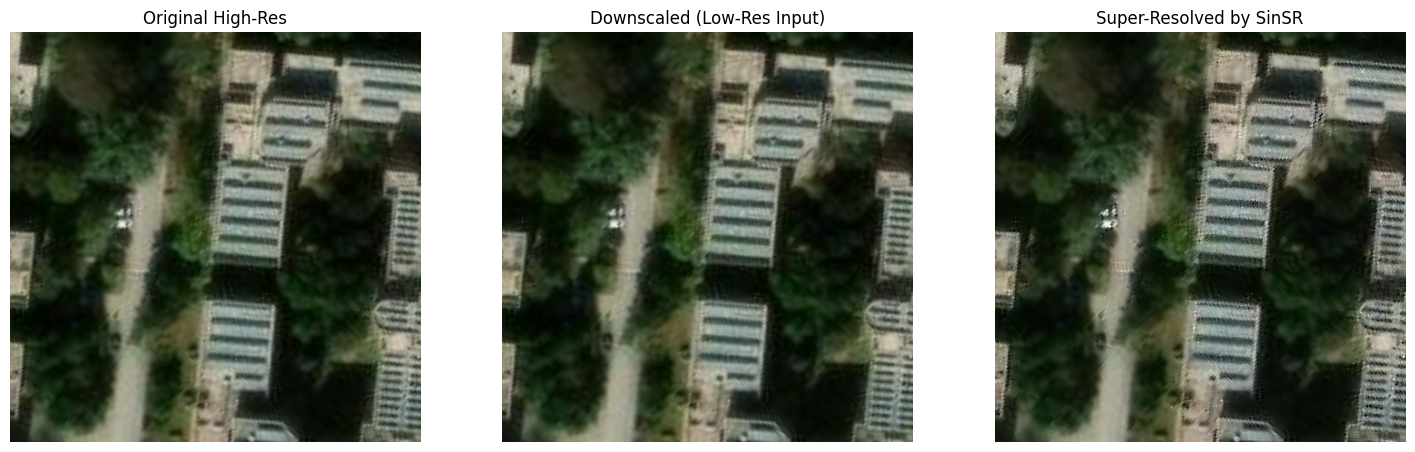

In [12]:
import matplotlib.pyplot as plt

original_path = '/kaggle/working/SinSR-main/input_images/exported_grid_112.png'
downscaled_path = '/kaggle/working/SinSR-main/input_images/downscaled_exported_grid_112.png'
reconstructed_path = '/kaggle/working/SinSR-main/output_images_downscaled/downscaled_exported_grid_112.png'

original = Image.open(original_path)
downscaled = Image.open(downscaled_path)
reconstructed = Image.open(reconstructed_path)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(original)
plt.title('Original High-Res')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(downscaled)
plt.title('Downscaled (Low-Res Input)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed)
plt.title('Super-Resolved by SinSR')
plt.axis('off')

plt.show()


In [20]:
!cd /kaggle/working/
!wget https://github.com/IceClear/StableSR/archive/refs/heads/main.zip
%cd StableSR

--2025-04-28 17:59:07--  https://github.com/IceClear/StableSR/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/IceClear/StableSR/zip/refs/heads/main [following]
--2025-04-28 17:59:07--  https://codeload.github.com/IceClear/StableSR/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip.2’

main.zip.2              [  <=>               ]   5.36M  20.5MB/s    in 0.3s    

2025-04-28 17:59:07 (20.5 MB/s) - ‘main.zip.2’ saved [5622920]

[Errno 2] No such file or directory: 'StableSR'
/kaggle/working/SinSR-main
